In [1]:
import gluon
import view_gluon

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
Nt = 32
#mode = "FULL"
mode= {"VRS":"test"}

renorm_mu = -58
escale = 1.7606
Tc=167

In [7]:
for i in range(1,6):
    path = f"Gen2l_{Nt}x32n{i}-VRS"
    try:
        gluon.spatial(Nt, 1, mode, check_divA=False, rand_selection=[path], save_prop=True, regenerate=False, pattern='coulomb')
    except Exception as e:
        print(e)

No cached file found. Generating...
/home/ben/Work/gauge_confs/confs/test/32x32/Gen2l_32x32n1-VRS
Saving propagator...
No cached file found. Generating...
/home/ben/Work/gauge_confs/confs/test/32x32/Gen2l_32x32n2-VRS
Saving propagator...
No cached file found. Generating...
/home/ben/Work/gauge_confs/confs/test/32x32/Gen2l_32x32n3-VRS
Saving propagator...
No cached file found. Generating...
/home/ben/Work/gauge_confs/confs/test/32x32/Gen2l_32x32n4-VRS
Saving propagator...
No cached file found. Generating...
/home/ben/Work/gauge_confs/confs/test/32x32/Gen2l_32x32n5-VRS
Saving propagator...


In [8]:
results = {}

for Nt in [32]: 
    
    mode = '-VRS'

    prop = view_gluon.propagator(Nt,mode,n_samples='all',gtype="coulomb")
    print(Nt,len(prop.prop_info))
    q = prop.q
    D = prop.D
    
    # Z3 average
    qz3, Dz3 = prop.Z3_average(q,D)
    
    # _,_ = prop.half_cut()
    
    # Cone cut
    qc, Dc = prop.cone_cut(radius=1)
    
    # Lattice momentum correction
    qi = prop.correct_q(qc,qtype="improved")
    
    # Renormalize
    prop.renormalize()
    
    results[Nt] = {'f':prop.f.copy(), 'D': prop.D.copy(),'alpha':prop.alpha,'q':qi, 'Nconf':len(prop.prop_info), 'chisq': prop.chisq}


32 5


/home/ben/Work/gluon-prop/view_gluon.py:91: RuntimeWarning: divide by zero encountered in divide
  z = xi*p0/norm_p


32 0.9862(31) 5 0.34727761089084(30)


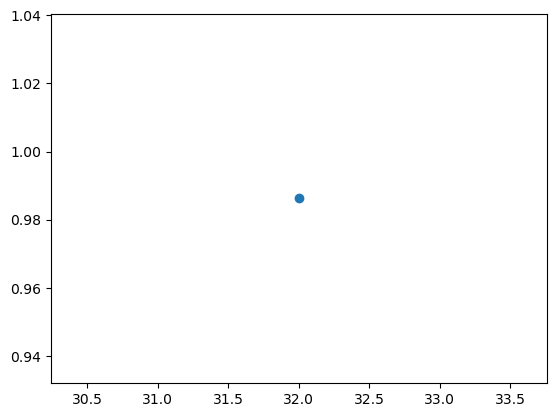

In [9]:
for Nt in results.keys():
    print(Nt, results[Nt]['alpha'] , results[Nt]['Nconf'], results[Nt]['chisq'])
    plt.scatter(Nt,results[Nt]['alpha'].mean)



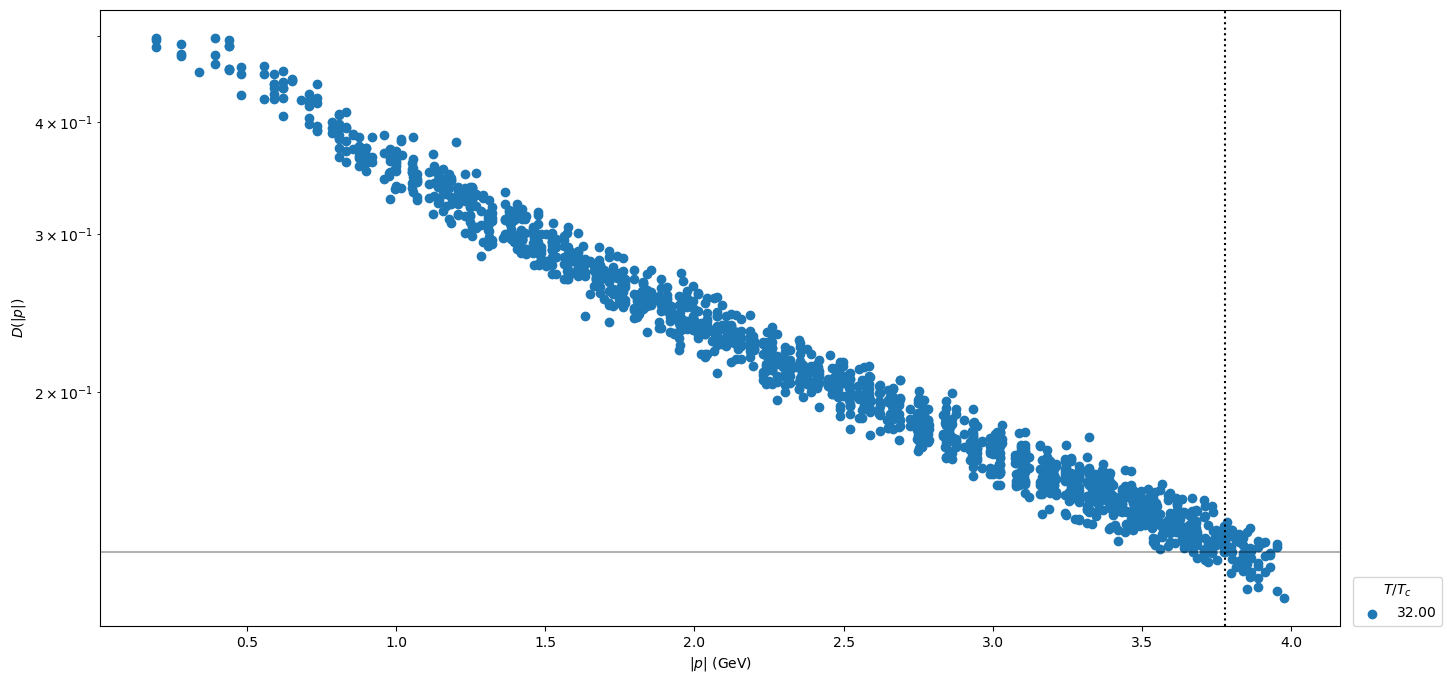

In [10]:
plt.figure(figsize=(16,8))
for pos,Nt in enumerate(results.keys()):
    q = results[Nt]['q'].copy()
    q = np.asarray([np.linalg.norm(qi[1:]) for qi in q[q[:,0]==0][1:]])
    D = results[Nt]['f'].copy()
    
    mu = q[renorm_mu]
    
    Z = 1/(D[renorm_mu]*mu*2)
    
    D *= Z
    
    label = f"{Nt:.2f}"
    
    plt.scatter(q+0.018*pos,np.asarray([d.mean for d in D]),label=label,ls='-')
    
ax = plt.gca()
ax.axvline(mu,0,1,ls=':',c='k')
ax.axhline(1/(2*mu),0,1,c='k',alpha=0.3)
    
plt.legend(loc=(1.01,0),title='$T/T_c$')
plt.ylabel('$D(|p|)$')
#plt.yticks([])
plt.xlabel('$|p|$ (GeV)')
plt.yscale('log')